In [1]:
%load_ext autoreload
%autoreload 2

In [76]:
import sys
sys.path.insert(0, '../scripts/')

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold 
from sklearn.linear_model import LogisticRegression
from causalnex.structure import DAGClassifier
from sklearn.metrics import jaccard_score
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

In [78]:
root_dir = Path().cwd().parent
data_dir = root_dir / "data"

In [79]:
df = pd.read_csv(data_dir / "data_clean.csv")

In [80]:
df["diagnosis"] = df["diagnosis"].apply(lambda x: 0 if x == "M" else 1)

In [81]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,84358402,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [82]:
# standard_scaler = StandardScaler()

In [83]:
X = df.iloc[:, 2:]
y = df["diagnosis"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# X_train = standard_scaler.fit_transform(X_train)
# X_test = standard_scaler.transform(X_test)

MEAN Score: 0.976


(<Figure size 782.64x581.04 with 1 Axes>, <AxesSubplot:>)

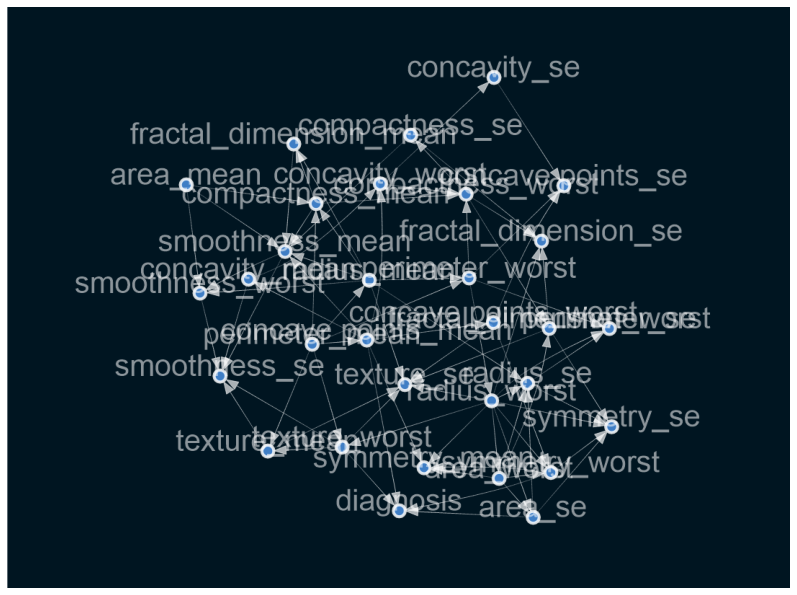

In [86]:
clf = DAGClassifier(
    alpha=0.1,
    beta=0.9,
    hidden_layer_units=[5],
    fit_intercept=True,
    standardize=True
)

scores = cross_val_score(clf, X_train, y_train, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')

clf.fit(X_train, y_train)
    
clf.plot_dag(True)

In [65]:
pd.Series(clf.coef_[0], index=X_train.columns.tolist()).sort_values(ascending=False)

symmetry_se                0.336544
compactness_se             0.329218
fractal_dimension_se       0.288342
texture_se                 0.240883
compactness_mean           0.237448
compactness_worst          0.132764
symmetry_mean              0.082555
fractal_dimension_worst    0.030828
smoothness_mean            0.021747
texture_mean              -0.015562
perimeter_se              -0.030125
radius_mean               -0.032240
perimeter_mean            -0.041957
area_mean                 -0.055992
smoothness_se             -0.087236
perimeter_worst           -0.129012
concavity_worst           -0.132177
concave points_se         -0.166006
smoothness_worst          -0.170746
fractal_dimension_mean    -0.220263
concavity_se              -0.263324
concave points_worst      -0.276333
radius_worst              -0.292370
concavity_mean            -0.310743
radius_se                 -0.312248
area_worst                -0.328776
concave points_mean       -0.453513
symmetry_worst            -0

In [66]:
pd.Series(clf.feature_importances_[0], index=X_train.columns.tolist()).sort_values(ascending=False)

texture_worst              0.677166
area_se                    0.567622
symmetry_worst             0.479802
concave points_mean        0.453783
symmetry_se                0.338497
compactness_se             0.331385
area_worst                 0.328776
radius_se                  0.315849
concavity_mean             0.310758
radius_worst               0.292370
fractal_dimension_se       0.288441
concave points_worst       0.276333
concavity_se               0.263324
texture_se                 0.242483
compactness_mean           0.237448
fractal_dimension_mean     0.221676
smoothness_worst           0.170746
concave points_se          0.169297
compactness_worst          0.132768
concavity_worst            0.132605
perimeter_worst            0.129012
perimeter_se               0.091457
smoothness_se              0.088839
symmetry_mean              0.082555
area_mean                  0.055992
perimeter_mean             0.041957
radius_mean                0.032240
fractal_dimension_worst    0

In [91]:
clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values

array([0.68788433, 0.57535577, 0.47063997, 0.4592343 , 0.342125  ,
       0.32552442, 0.32033211, 0.31875709, 0.31557229, 0.29810888,
       0.27755499, 0.27134919, 0.25221783, 0.25136286, 0.24695896,
       0.23387696, 0.17264615, 0.16353367, 0.12762758, 0.12261957,
       0.12069171, 0.09413568, 0.09045757, 0.07482591, 0.05769288,
       0.0439701 , 0.03419461, 0.03175712, 0.02672874, 0.01153386])

In [92]:
# storing all important features and their values as the ground truth
all_important_features = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).index.tolist()
all_features_ground_truth = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values.tolist()

In [93]:
# selecting 9 important features from the graph
features_9 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).index.tolist()[:9]
ground_truth_9 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values.tolist()[:9]

In [94]:
# np.intersect1d(clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values, clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values).size / np.union1d(clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values, clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values).size 

In [97]:
def jaccard_similarity_index(ground_truth_values, new_edges_values):
    intersection = np.intersect1d(ground_truth_values, new_edges_values).size
    union = np.union1d(ground_truth_values, new_edges_values).size
    return intersection / union

## 20% of the data

In [99]:
# 20 percent of the training data

X_train_20 = X_train.sample(frac=0.2)
y_train_20 = y.iloc[X_train_20.index.tolist()]

MEAN Score: 0.945


(<Figure size 887.76x932.4 with 1 Axes>, <AxesSubplot:>)

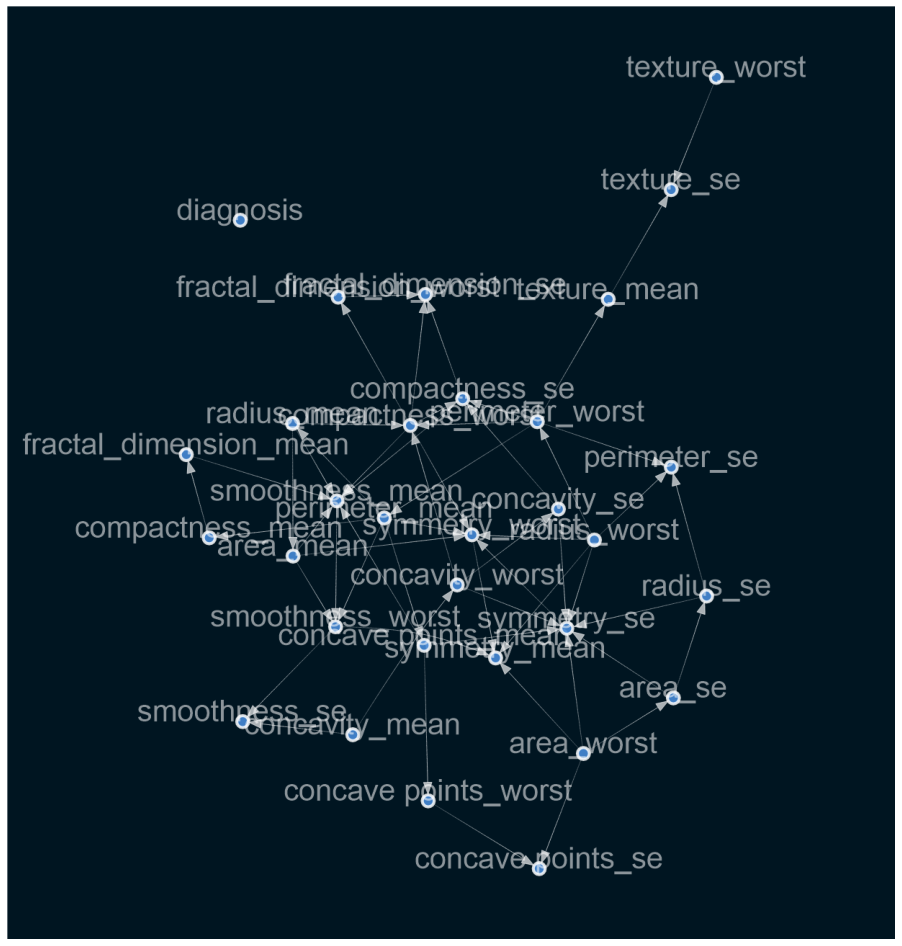

In [100]:
scores = cross_val_score(clf, X_train_20, y_train_20, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')

clf.fit(X_train_20, y_train_20)
    
clf.plot_dag(True)

# storing all important features and their values as the ground truth
all_important_features_20 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).index.tolist()
all_features_ground_truth_20 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values.tolist()

# selecting 9 important features from the graph
features_20_9 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).index.tolist()[:9]
ground_truth_20_9 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values.tolist()[:9]

In [121]:
jaccard_similarity_index(features_9, features_20_9)

0.5

## 40% of the data

In [135]:
# 40 percent of the training data

X_train_40 = X_train.sample(frac=0.4)
y_train_40 = y.iloc[X_train_40.index.tolist()]

MEAN Score: 0.945


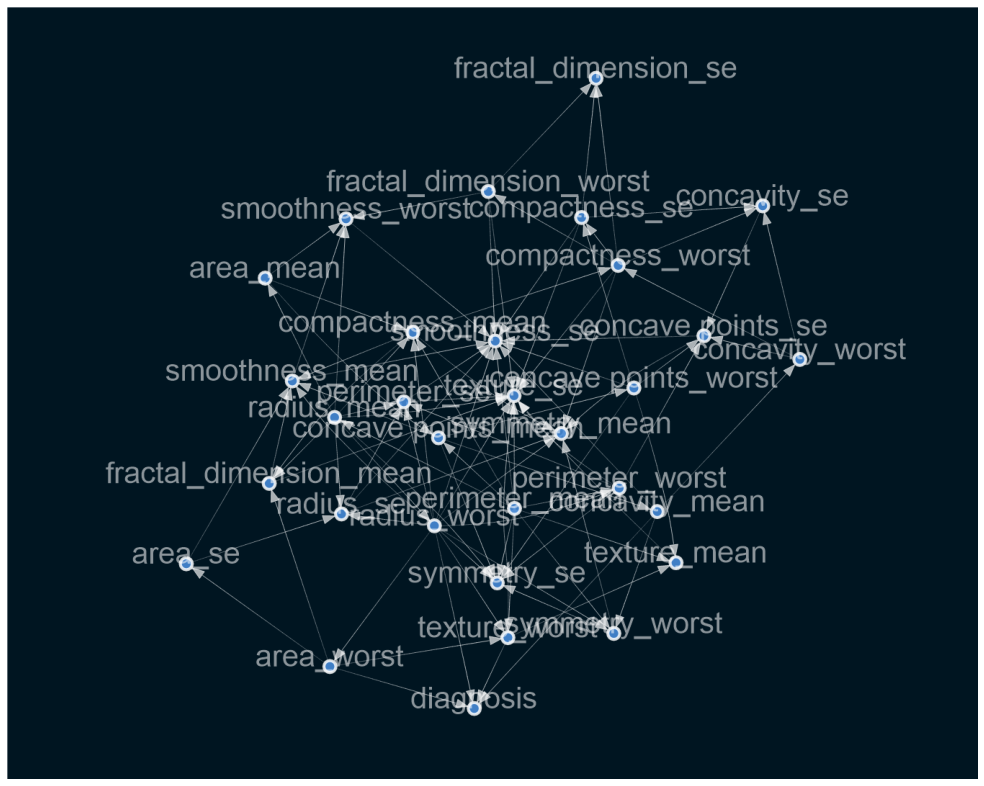

In [134]:
scores = cross_val_score(clf, X_train_40, y_train_40, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')

clf.fit(X_train_40, y_train_40)
    
clf.plot_dag(True)

# storing all important features and their values as the ground truth
all_important_features_40 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).index.tolist()
all_features_ground_truth_40 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values.tolist()

# selecting 9 important features from the graph
features_40_9 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).index.tolist()[:9]
ground_truth_40_9 = clf.get_edges_to_node("diagnosis").sort_values(ascending=False).values.tolist()[:9]

In [138]:
jaccard_similarity_index(features_9, features_40_9)

0.5

In [122]:
# from causalnex.structure.notears import from_pandas
# from causalnex.network import BayesianNetwork
# import networkx as nx
# from IPython.display import Image
# from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE


# sm = from_pandas(df_5.iloc[:, 1:], tabu_parent_nodes=["diagnosis"])
# plot = plot_structure(sm, graph_attributes={"scale": "0.5"},
#     all_node_attributes=NODE_STYLE.WEAK,
#     all_edge_attributes=EDGE_STYLE.WEAK)
# Image(plot.draw(format='png'))
# fig = plt.figure(figsize=(20, 10))  # set figsize
# nx.draw_networkx(sm)
# plot.draw("plot.png")

In [151]:
np.intersect1d(features_9, features_20_9, features_40_9)

array(['area_se', 'area_worst', 'concavity_mean', 'radius_se',
       'symmetry_worst', 'texture_worst'], dtype='<U19')

In [152]:
selected_features = ['area_se', 'area_worst', 'concavity_mean', 'radius_se', 'symmetry_worst', 'texture_worst']

In [156]:
X_train_selected = X_train.loc[:, selected_features]
y_train_selected = y.iloc[X_train_selected.index.tolist()]

MEAN Score: 0.965


(<Figure size 581.04x359.28 with 1 Axes>, <AxesSubplot:>)

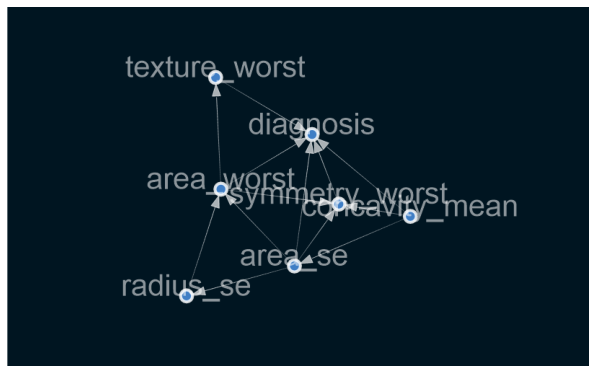

In [158]:
scores = cross_val_score(clf, X_train_selected, y_train_selected, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')

clf.fit(X_train_selected, y_train_selected)
    
clf.plot_dag(True)